In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader # these are needed for the training data
import matplotlib.pyplot as plt
import numpy as np
#from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import csv


In [2]:
# Load your dataset from a CSV file using pandas
# Assuming your CSV file has columns 'feature1', 'feature2', ..., 'feature5', 'target'
df = pd.read_csv("C:/Users/esteb/OneDrive/Escritorio/CSV de prueba/Base de datos clinker1.csv")
df2 = pd.read_csv("C:/Users/esteb/OneDrive/Escritorio/CSV de prueba/Base de datos clinker2.csv")
df3 = pd.read_csv("C:/Users/esteb/OneDrive/Escritorio/CSV de prueba/Base de datos clinker3.csv")
df4 = pd.read_csv("C:/Users/esteb/OneDrive/Escritorio/CSV de prueba/Base de datos clinker4.csv")

df = pd.concat([df, df2], ignore_index=True)
df = pd.concat([df, df3], ignore_index=True)
df = pd.concat([df, df4], ignore_index=True)


print(df.columns)

Index(['FECHA', 'HORA', '% R90', '% PxC', 'MA', 'MS', 'SC', '%O2', '%NO',
       '%CO', 'BTZ (°C)', 'FCC (T/h)', 'AH (T/h)', 'AMP', 'CIM (t)',
       'CG (T/h)', 'RPM', 'BET (°C)', 'LIQ', '% CO2', '% C3S', '% C3A',
       '% C2S', '% C4AF', '% CaO(l)'],
      dtype='object')


In [3]:
df

,FECHA,HORA,% R90,% PxC,MA,MS,SC,%O2,%NO,%CO,...,CG (T/h),RPM,BET (°C),LIQ,% CO2,% C3S,% C3A,% C2S,% C4AF,% CaO(l)
0,2010-10-02,11:36:00,NaN,NaN,1.86,2.98,96.1,5.0715,1144.0,0.0154,...,0.000000,0.7796,590.900024,0.0,12.56123,NaN,NaN,NaN,NaN,NaN
1,2010-10-02,11:37:00,NaN,NaN,NaN,NaN,NaN,4.3344,1313.0,0.0154,...,0.000000,0.7796,590.900024,0.0,12.56123,NaN,NaN,NaN,NaN,NaN
2,2010-10-02,11:38:00,NaN,NaN,NaN,NaN,NaN,4.9917,1421.2,0.0154,...,0.000000,0.7796,590.900024,0.0,12.56123,NaN,NaN,NaN,NaN,NaN
3,2010-10-02,11:39:00,NaN,NaN,NaN,NaN,NaN,5.0694,1360.4,0.0154,...,0.000000,0.7796,590.900024,0.0,12.54368,NaN,NaN,NaN,NaN,NaN
4,2010-10-02,11:40:00,NaN,NaN,NaN,NaN,NaN,4.9749,1318.0,0.0154,...,0.000000,0.7796,590.900024,0.0,12.65431,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61334,2010-11-15,14:10:00,NaN,NaN,NaN,NaN,NaN,4.2882,1384.2,0.0505,...,0.009292,2.6868,596.300000,0.0,13.55840,NaN,NaN,NaN,NaN,NaN
61335,2010-11-15,14:11:00,NaN,NaN,NaN,NaN,NaN,4.6452,1404.8,0.0607,...,0.009292,2.6868,596.300000,0.0,13.37072,NaN,NaN,NaN,NaN,NaN
61336,2010-11-15,14:12:00,NaN,NaN,NaN,NaN,NaN,4.8174,1383.2,0.0607,...,0.009292,2.6868,597.400000,0.0,13.29519,NaN,NaN,NaN,NaN,NaN
61337,2010-11-15,14:13:00,NaN,NaN,NaN,NaN,NaN,4.4079,1279.4,0.0497,...,0.008290,2.6868,597.400024,0.0,13.16320,NaN,NaN,NaN,NaN,NaN


In [4]:
# Lista de columnas en las que deseas eliminar filas con valores vacíos
columnas_a_verificar = ['% CaO(l)']
# Lista de nombres de columnas que deseas eliminar
columnas_a_eliminar = ['FECHA', 'HORA','% R90','% PxC','MA','MS','SC', 'LIQ']

# Elimina las columnas especificadas
df_con_fecha = df.drop(columns=['% R90','% PxC','MA','MS','SC', 'LIQ'])
df_sin_nulos = df.drop(columns=columnas_a_eliminar)

# Elimina las filas con valores vacíos en las columnas especificadas
df_sin_nulos = df_sin_nulos.dropna(subset=columnas_a_verificar)
df_con_fecha= df_con_fecha.dropna(subset=columnas_a_verificar)
df_sin_nulos = df_sin_nulos.dropna()
df_con_fecha = df_con_fecha.dropna()


#porcentaje_a_predecir_Alita = df_sin_nulos["% C3S"].values
#porcentaje_a_predecir_Belita = df_sin_nulos["% C3A"].values
#porcentaje_a_predecir_Aluminato = df_sin_nulos["% C2S"].values
#porcentaje_a_predecir_Ferritoaluminato = df_sin_nulos["% C4AF"].values
#porcentaje_a_predecir_Oxido_de_calcio  = df_sin_nulos["% CaO(l)"].values


print(df_sin_nulos.columns)
#print(porcentaje_a_predecir_Alita)
#print(porcentaje_a_predecir_Belita)
#print(porcentaje_a_predecir_Aluminato)
#print(porcentaje_a_predecir_Ferritoaluminato)
#print(porcentaje_a_predecir_Oxido_de_calcio)



Index(['%O2', '%NO', '%CO', 'BTZ (°C)', 'FCC (T/h)', 'AH (T/h)', 'AMP',
       'CIM (t)', 'CG (T/h)', 'RPM', 'BET (°C)', '% CO2', '% C3S', '% C3A',
       '% C2S', '% C4AF', '% CaO(l)'],
      dtype='object')


In [5]:
df_sin_nulos

,%O2,%NO,%CO,BTZ (°C),FCC (T/h),AH (T/h),AMP,CIM (t),CG (T/h),RPM,BET (°C),% CO2,% C3S,% C3A,% C2S,% C4AF,% CaO(l)
202,5.3382,1455.0,0.0158,1439.21,6.5388,114.570000,189.3350,0.000000,0.000000,1.3528,592.100000,13.53857,63.3,8.0,15.5,7.7,1.40
291,4.8909,1607.4,0.0158,1531.82,6.8472,136.080002,272.6500,0.000000,0.000000,1.8080,578.700000,13.82010,65.4,8.0,13.5,7.6,1.24
532,4.0614,1213.6,0.0194,1502.00,7.6584,153.341995,204.1075,0.000000,0.000000,2.8260,556.500000,14.06577,65.2,8.2,13.6,7.9,1.05
751,4.1685,1503.2,0.0193,1497.03,7.7100,154.116000,201.2575,0.000000,0.000000,2.8260,553.200012,14.02838,63.7,8.2,14.3,8.0,1.69
990,4.2840,1246.4,0.0172,1490.10,7.6284,154.602005,167.8175,0.000000,0.000000,2.8260,549.800000,14.16037,67.1,8.1,11.9,7.7,1.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60258,3.8640,1367.4,0.0354,1555.13,7.2324,156.870000,203.7750,0.019680,0.011860,2.8632,588.700000,13.72854,64.4,7.8,14.0,7.8,0.83
60511,4.9749,862.8,0.0242,1169.71,7.1928,153.414000,190.4750,0.014800,0.000000,2.9088,588.599976,12.78553,63.8,8.0,14.5,7.9,1.07
60734,3.7653,1301.6,0.0221,1571.37,7.8324,152.225998,231.3725,0.000013,0.000000,2.8468,596.300000,12.37354,67.1,7.8,12.7,8.0,0.58
61013,4.4289,1023.8,0.0300,1305.23,7.9044,152.837997,213.8450,0.000000,0.000000,2.8496,585.200012,12.54368,67.5,7.8,12.0,8.2,0.55


In [6]:
# Aquí normalizamos los datos.
scaler = MinMaxScaler()
#scaler = StandardScaler()
datos_min_max = scaler.fit_transform(df_sin_nulos)


# Accede a la columna específica después de la inversión de la transformación.
#C3A_despues_transformacion = datos_min_max[:, df_sin_nulos.columns.get_loc('% C3A')]
#C2S_despues_transformacion = datos_min_max[:, df_sin_nulos.columns.get_loc('% C2S')]
#C4AF_despues_transformacion = datos_min_max[:, df_sin_nulos.columns.get_loc('% C4AF')]
#Calcio_despues_transformacion = datos_min_max[:, df_sin_nulos.columns.get_loc('% CaO(l)')]

# Ahora imprime los valores de la columna.
#print(C3S_despues_transformacion)
#print(C3A_despues_transformacion)
#print(C2S_despues_transformacion)
#print(C4AF_despues_transformacion)
#print(Calcio_despues_transformacion)


In [7]:
#datos_normalizer = preprocessing.Normalizer().transform(df_sin_nulos.T)
#datos_normalizer = datos_normalizer.T

#datos_normalizer

In [8]:
#datos_standard_scaler = preprocessing.StandardScaler().fit_transform(df_sin_nulos)

#datos_robust_scaler = preprocessing.RobustScaler().fit_transform(df_sin_nulos)

#datos_standard_scaler, datos_robust_scaler
#print(df_sin_nulos.columns)

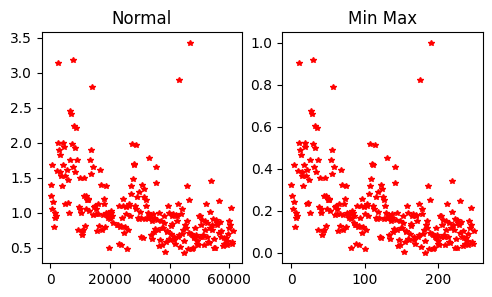

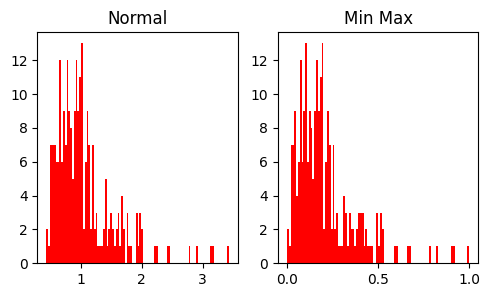

In [9]:
datos_min_max = pd.DataFrame(datos_min_max, columns=['%O2', '%NO', '%CO','BTZ (°C)', 'FCC (T/h)', 'AH (T/h)', 'AMP', 'CIM (t)','CG (T/h)','RPM','BET (°C)','% CO2','% C3S', '% C3A', '% C2S', '% C4AF', '% CaO(l)'])
#datos_normalizer = pd.DataFrame(datos_normalizer, columns=['%O2', '%NO', '%CO','% CO2','BTZ (°C)', 'FCC (T/h)', 'AH (T/h)', 'AMP', 'CIM (t)',
 #      'CG (T/h)', 'RPM', 'BET (°C)', 'LIQ','% C3S'])
#datos_standard_scaler = pd.DataFrame(datos_standard_scaler, columns=['%O2', '%NO', '%CO','% CO2','BTZ (°C)', 'FCC (T/h)', 'AH (T/h)', 'AMP', 'CIM (t)',
  #     'CG (T/h)', 'RPM', 'BET (°C)', 'LIQ','% C3S'])
#datos_robust_scaler = pd.DataFrame(datos_robust_scaler, columns=['%O2', '%NO', '%CO','% CO2','BTZ (°C)', 'FCC (T/h)', 'AH (T/h)', 'AMP', 'CIM (t)',
  #     'CG (T/h)', 'RPM', 'BET (°C)', 'LIQ','% C3S'])

fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
#ax3 = fig.add_subplot(1,5,3)
#ax4 = fig.add_subplot(1,5,4)
#ax5 = fig.add_subplot(1,5,5)

ax1.set_title("Normal")
ax1.plot(df_sin_nulos['% CaO(l)'], linewidth=0, marker="*", color="red", markersize=4)

ax2.set_title("Min Max")
ax2.plot(datos_min_max['% CaO(l)'], linewidth=0, marker="*", color="red", markersize=4)

#ax3.set_title("normalizer")
#ax3.plot(datos_normalizer["%NO"], linewidth=0, marker="*", color="red", markersize=4)

#ax4.set_title("standard")
#ax4.plot(datos_standard_scaler["%NO"], linewidth=0, marker="*", color="red", markersize=4)

#ax5.set_title("robuts")
#ax5.plot(datos_robust_scaler["%NO"], linewidth=0, marker="*", color="red", markersize=4)


fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
#ax3 = fig.add_subplot(1,5,3)
#ax4 = fig.add_subplot(1,5,4)
#ax5 = fig.add_subplot(1,5,5)

ax1.set_title("Normal")
ax1.hist(df_sin_nulos['% CaO(l)'],color="red", bins=100)

ax2.set_title("Min Max")
ax2.hist(datos_min_max['% CaO(l)'], color="red", bins=100)

#ax3.set_title("normalizer")
#ax3.hist(datos_normalizer["%NO"], color="red", bins=100)

#ax4.set_title("standard")
#ax4.hist(datos_standard_scaler["%NO"],color="red", bins=100)

#ax5.set_title("robuts")
#ax5.hist(datos_robust_scaler["%NO"], color="red", bins=100)

plt.show()

In [10]:
print(datos_min_max.columns)

Index(['%O2', '%NO', '%CO', 'BTZ (°C)', 'FCC (T/h)', 'AH (T/h)', 'AMP',
       'CIM (t)', 'CG (T/h)', 'RPM', 'BET (°C)', '% CO2', '% C3S', '% C3A',
       '% C2S', '% C4AF', '% CaO(l)'],
      dtype='object')


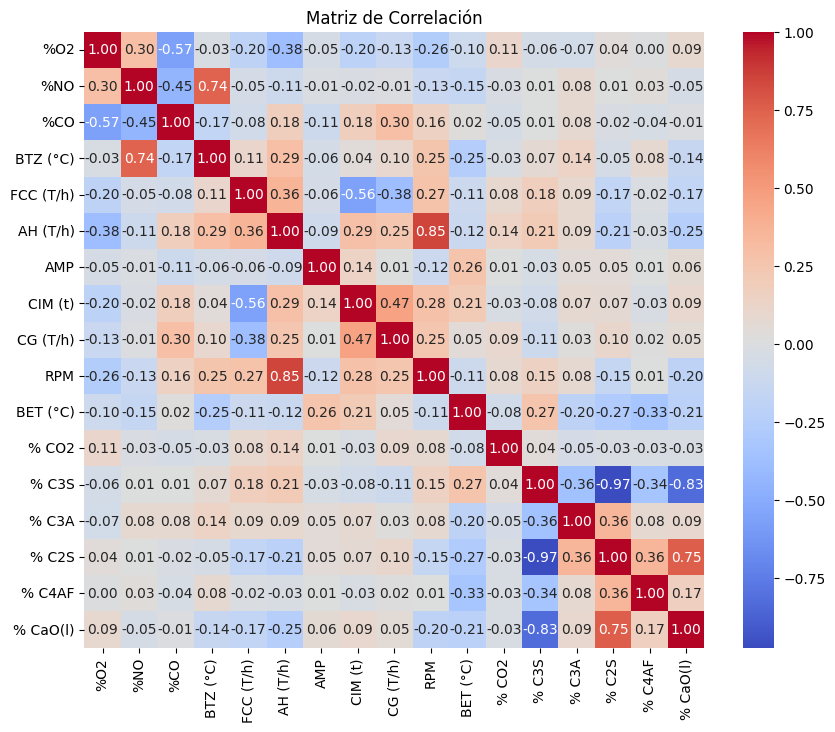

In [11]:
# Calcula la matriz de correlación
matriz_correlacion = datos_min_max.corr()

# Imprime la matriz de correlación
#print("Matriz de Correlación:")
#print(matriz_correlacion)

# Crea un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [12]:
print(datos_min_max.columns)

Index(['%O2', '%NO', '%CO', 'BTZ (°C)', 'FCC (T/h)', 'AH (T/h)', 'AMP',
       'CIM (t)', 'CG (T/h)', 'RPM', 'BET (°C)', '% CO2', '% C3S', '% C3A',
       '% C2S', '% C4AF', '% CaO(l)'],
      dtype='object')


In [13]:
# Assuming the columns are named 'feature1' to 'feature5' for input features and 'target' for the output
X = datos_min_max[["%O2", '%NO', '%CO','% CO2', 'BTZ (°C)', 'FCC (T/h)', 'AH (T/h)','AMP', 'CIM (t)', 'CG (T/h)', 'RPM', 'BET (°C)','% C3S','% C3A', '% C2S','% C4AF']].values
y = datos_min_max['% CaO(l)'].values

# Convert data to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [14]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Take the output from the last time step
        return out

# Set hyperparameters
input_size = 16  # Number of input features
hidden_size = 8  # Number of LSTM units
output_size = 1  # Number of output units

# Instantiate the model
model = LSTMModel(input_size, hidden_size, output_size)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Antes del bucle de entrenamiento
losses = []

# Create a TensorDataset and DataLoader for training
dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=2, shuffle=True)

# Training loop
epochs = 2000
for epoch in range(epochs):
    for inputs, labels in loader:
        optimizer.zero_grad()
        outputs = model(inputs.unsqueeze(1))  # Add an extra dimension for the sequence length
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
    
    losses.append(loss.item())
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

# Print the final predictions
model.eval()
with torch.no_grad():
    predictions = model(X.unsqueeze(1))

print("Predictions:")
print(predictions.squeeze().numpy())

# Convertir a numpy arrays para facilitar el trazado
predictions = predictions.squeeze().numpy()
y_actual = y.numpy()

Epoch 1/2000, Loss: 0.003150918520987034
Epoch 2/2000, Loss: 0.007097134366631508
Epoch 3/2000, Loss: 0.07127311825752258
Epoch 4/2000, Loss: 0.01195459347218275
Epoch 5/2000, Loss: 0.016313977539539337
Epoch 6/2000, Loss: 0.006011308170855045
Epoch 7/2000, Loss: 0.002942014718428254
Epoch 8/2000, Loss: 0.0014723415952175856
Epoch 9/2000, Loss: 0.00042231741826981306
Epoch 10/2000, Loss: 0.017999911680817604
Epoch 11/2000, Loss: 0.026439806446433067
Epoch 12/2000, Loss: 0.006277535110712051
Epoch 13/2000, Loss: 0.011996593326330185
Epoch 14/2000, Loss: 0.0017418379429727793
Epoch 15/2000, Loss: 0.01076534204185009
Epoch 16/2000, Loss: 0.00708381412550807
Epoch 17/2000, Loss: 0.0014636238338425756
Epoch 18/2000, Loss: 0.01749551296234131
Epoch 19/2000, Loss: 0.014299030415713787
Epoch 20/2000, Loss: 0.013392518274486065
Epoch 21/2000, Loss: 0.036374781280756
Epoch 22/2000, Loss: 0.0015254556201398373
Epoch 23/2000, Loss: 0.013844982720911503
Epoch 24/2000, Loss: 0.0031579239293932915
Ep

In [15]:
##print("pesos y sesgos: ")
#for name, param in model.named_parameters():
#    print(name, param.data)

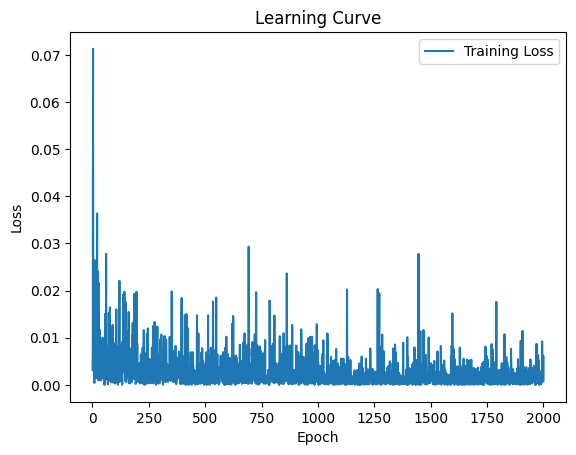

In [16]:
# Después del entrenamiento
plt.plot(np.arange(1, epochs + 1), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

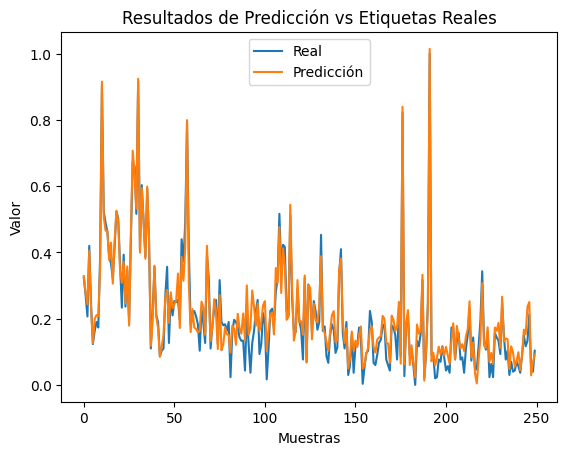

In [17]:
# Graficar las predicciones y las etiquetas reales
plt.plot(y_actual, label='Real')
plt.plot(predictions, label='Predicción')
plt.title('Resultados de Predicción vs Etiquetas Reales')
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.legend()
plt.show()

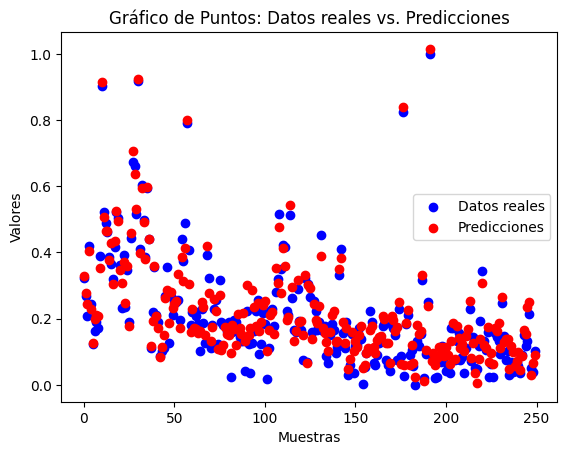

In [18]:
plt.scatter(range(len(y_actual)), y_actual, label='Datos reales', color='blue')
plt.scatter(range(len(predictions)), predictions, label='Predicciones', color='red')
plt.xlabel('Muestras')
plt.ylabel('Valores')
plt.title('Gráfico de Puntos: Datos reales vs. Predicciones')
plt.legend()
plt.show()

In [19]:
sin_norma = df_sin_nulos['% CaO(l)'].values #valores que se esperan originales, no normalizados
con_norma = y_actual #valores que se esperan, normalizados

In [20]:
numero_filas = len(predictions)

with open('Graficar_funcion.csv', 'w', newline='') as archivo_csv:
    escritor_csv = csv.writer(archivo_csv, delimiter='/')

    escritor_csv.writerow(['resultado_calidad','cal libre normalizado','cal libre original'])

    for i in range(numero_filas):
        resultado_calidad = str(predictions[i]).replace('.', ',')
        resultado_con_norma = str(con_norma[i]).replace('.', ',')
        resultado_sin_norma = str(sin_norma[i]).replace('.', ',')


        escritor_csv.writerow([resultado_calidad,resultado_con_norma,resultado_sin_norma])

print("Archivo CSV generado exitosamente: datos_clinker.csv")

Archivo CSV generado exitosamente: datos_clinker.csv


In [21]:
predictions[3]

0.40519205

In [22]:
sin_norma[3]

1.69

In [23]:
con_norma[3]

0.42

In [24]:
prueba = (con_norma[3] * 3.0005) + 0.43
print(prueba)

1.690209960654378


In [25]:
prueba = (predictions[3] * 3.0005) + 0.43
print(prueba)

1.6457787380963564


In [26]:
#y = 3,0005x 
#x = normalizado
#y = sin normalizar

numero_filas = len(predictions)
predict_sin_norma = []
print(numero_filas)

250


In [27]:
for i in range(numero_filas):
    predict_sin_norma.append((3.0005 * predictions[i]) + 0.43)
    
predict_sin_norma = [round(valor, 3) for valor in predict_sin_norma]



In [28]:
with open('comparacion_resultado.csv', 'w', newline='') as archivo_csv:
    escritor_csv = csv.writer(archivo_csv, delimiter='/')

    escritor_csv.writerow(['resultado_prediccion_normalizado','prediccion_sin_normalizar','cal libre normalizado','cal libre original'])

    for i in range(numero_filas):
        prediccion_norma = str(predictions[i]).replace('.', ',')
        resultado_con_norma = str(con_norma[i]).replace('.', ',')
        prediccion_sin_norma = str(predict_sin_norma[i]).replace('.', ',')
        original_sin_norma = str(sin_norma[i]).replace('.', ',')

        escritor_csv.writerow([prediccion_norma,prediccion_sin_norma,resultado_con_norma,original_sin_norma])

print("Archivo CSV generado exitosamente: Comparacion_resultado.csv")

Archivo CSV generado exitosamente: Comparacion_resultado.csv


In [29]:
largo=len(df_sin_nulos)
Calificacion = []

for i in range(largo):
    if np.isnan(sin_norma[i]):
        Calificacion.append("Incalculable")
    elif sin_norma[i] <= 0:
        Calificacion.append("Excelente")
    elif 0 < sin_norma[i] <= 1:
        Calificacion.append("Alta")
    elif 1 < sin_norma[i] <= 2:
        Calificacion.append("Regular")
    else:
        Calificacion.append("Baja")

In [30]:
largo=len(df_sin_nulos)
Calificacion_predicha = []

for i in range(largo):
    if np.isnan(predict_sin_norma[i]):
        Calificacion_predicha.append("Incalculable")
    elif predict_sin_norma[i] <= 0:
        Calificacion_predicha.append("Excelente")
    elif 0 < predict_sin_norma[i] <= 1:
        Calificacion_predicha.append("Alta")
    elif 1 < predict_sin_norma[i] <= 2:
        Calificacion_predicha.append("Regular")
    else:
        Calificacion_predicha.append("Baja")

In [31]:
df_con_fecha['Prediccion Cal']=predict_sin_norma
df_con_fecha['Calificacion real']=Calificacion
df_con_fecha['Calificacion predicha']=Calificacion_predicha


In [32]:
# Combinar las columnas FECHA y HORA en una nueva columna FECHA_HORA
df_con_fecha['fecha_hora'] = pd.to_datetime(df_con_fecha['FECHA'] + ' ' + df_con_fecha['HORA'])

In [33]:
df_con_fecha = df_con_fecha.drop(columns=['FECHA','HORA'])

In [34]:
print(df_con_fecha.head())

        %O2     %NO     %CO  BTZ (°C)  FCC (T/h)    AH (T/h)       AMP  \
202  5.3382  1455.0  0.0158   1439.21     6.5388  114.570000  189.3350   
291  4.8909  1607.4  0.0158   1531.82     6.8472  136.080002  272.6500   
532  4.0614  1213.6  0.0194   1502.00     7.6584  153.341995  204.1075   
751  4.1685  1503.2  0.0193   1497.03     7.7100  154.116000  201.2575   
990  4.2840  1246.4  0.0172   1490.10     7.6284  154.602005  167.8175   

     CIM (t)  CG (T/h)     RPM  ...     % CO2  % C3S  % C3A  % C2S  % C4AF  \
202      0.0       0.0  1.3528  ...  13.53857   63.3    8.0   15.5     7.7   
291      0.0       0.0  1.8080  ...  13.82010   65.4    8.0   13.5     7.6   
532      0.0       0.0  2.8260  ...  14.06577   65.2    8.2   13.6     7.9   
751      0.0       0.0  2.8260  ...  14.02838   63.7    8.2   14.3     8.0   
990      0.0       0.0  2.8260  ...  14.16037   67.1    8.1   11.9     7.7   

     % CaO(l)  Prediccion Cal  Calificacion real Calificacion predicha  \
202      1.4

In [35]:
df_sin_nulos.to_csv('Tabla_valores.csv', index=False)

In [36]:
df_sin_nulos

,%O2,%NO,%CO,BTZ (°C),FCC (T/h),AH (T/h),AMP,CIM (t),CG (T/h),RPM,BET (°C),% CO2,% C3S,% C3A,% C2S,% C4AF,% CaO(l)
202,5.3382,1455.0,0.0158,1439.21,6.5388,114.570000,189.3350,0.000000,0.000000,1.3528,592.100000,13.53857,63.3,8.0,15.5,7.7,1.40
291,4.8909,1607.4,0.0158,1531.82,6.8472,136.080002,272.6500,0.000000,0.000000,1.8080,578.700000,13.82010,65.4,8.0,13.5,7.6,1.24
532,4.0614,1213.6,0.0194,1502.00,7.6584,153.341995,204.1075,0.000000,0.000000,2.8260,556.500000,14.06577,65.2,8.2,13.6,7.9,1.05
751,4.1685,1503.2,0.0193,1497.03,7.7100,154.116000,201.2575,0.000000,0.000000,2.8260,553.200012,14.02838,63.7,8.2,14.3,8.0,1.69
990,4.2840,1246.4,0.0172,1490.10,7.6284,154.602005,167.8175,0.000000,0.000000,2.8260,549.800000,14.16037,67.1,8.1,11.9,7.7,1.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60258,3.8640,1367.4,0.0354,1555.13,7.2324,156.870000,203.7750,0.019680,0.011860,2.8632,588.700000,13.72854,64.4,7.8,14.0,7.8,0.83
60511,4.9749,862.8,0.0242,1169.71,7.1928,153.414000,190.4750,0.014800,0.000000,2.9088,588.599976,12.78553,63.8,8.0,14.5,7.9,1.07
60734,3.7653,1301.6,0.0221,1571.37,7.8324,152.225998,231.3725,0.000013,0.000000,2.8468,596.300000,12.37354,67.1,7.8,12.7,8.0,0.58
61013,4.4289,1023.8,0.0300,1305.23,7.9044,152.837997,213.8450,0.000000,0.000000,2.8496,585.200012,12.54368,67.5,7.8,12.0,8.2,0.55


In [37]:
df_con_fecha.to_csv('Prediccion_calificada_con_fecha.csv', index=False)

In [38]:
df_con_fecha

,%O2,%NO,%CO,BTZ (°C),FCC (T/h),AH (T/h),AMP,CIM (t),CG (T/h),RPM,...,% CO2,% C3S,% C3A,% C2S,% C4AF,% CaO(l),Prediccion Cal,Calificacion real,Calificacion predicha,fecha_hora
202,5.3382,1455.0,0.0158,1439.21,6.5388,114.570000,189.3350,0.000000,0.000000,1.3528,...,13.53857,63.3,8.0,15.5,7.7,1.40,1.416,Regular,Regular,2010-10-02 14:58:00
291,4.8909,1607.4,0.0158,1531.82,6.8472,136.080002,272.6500,0.000000,0.000000,1.8080,...,13.82010,65.4,8.0,13.5,7.6,1.24,1.263,Regular,Regular,2010-10-02 16:27:00
532,4.0614,1213.6,0.0194,1502.00,7.6584,153.341995,204.1075,0.000000,0.000000,2.8260,...,14.06577,65.2,8.2,13.6,7.9,1.05,1.161,Regular,Regular,2010-10-02 20:28:00
751,4.1685,1503.2,0.0193,1497.03,7.7100,154.116000,201.2575,0.000000,0.000000,2.8260,...,14.02838,63.7,8.2,14.3,8.0,1.69,1.646,Regular,Regular,2010-10-03 00:07:00
990,4.2840,1246.4,0.0172,1490.10,7.6284,154.602005,167.8175,0.000000,0.000000,2.8260,...,14.16037,67.1,8.1,11.9,7.7,1.16,1.121,Regular,Regular,2010-10-03 04:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60258,3.8640,1367.4,0.0354,1555.13,7.2324,156.870000,203.7750,0.019680,0.011860,2.8632,...,13.72854,64.4,7.8,14.0,7.8,0.83,1.140,Alta,Regular,2010-11-14 20:14:00
60511,4.9749,862.8,0.0242,1169.71,7.1928,153.414000,190.4750,0.014800,0.000000,2.9088,...,12.78553,63.8,8.0,14.5,7.9,1.07,1.180,Regular,Regular,2010-11-15 00:27:00
60734,3.7653,1301.6,0.0221,1571.37,7.8324,152.225998,231.3725,0.000013,0.000000,2.8468,...,12.37354,67.1,7.8,12.7,8.0,0.58,0.517,Alta,Alta,2010-11-15 04:10:00
61013,4.4289,1023.8,0.0300,1305.23,7.9044,152.837997,213.8450,0.000000,0.000000,2.8496,...,12.54368,67.5,7.8,12.0,8.2,0.55,0.631,Alta,Alta,2010-11-15 08:49:00


In [39]:
# Supongamos que df_con_fecha es tu DataFrame
promedio_cal_libre = df_con_fecha['% CaO(l)'].mean()

print(f'El promedio de la columna "cal libre" en df_con_fecha es: {promedio_cal_libre}')


El promedio de la columna "cal libre" en df_con_fecha es: 1.05288


In [40]:
# Supongamos que df_con_fecha es tu DataFrame
promedio_cal_libre = df_con_fecha['Prediccion Cal'].mean()

print(f'El promedio de la columna "cal libre" en df_con_fecha es: {promedio_cal_libre}')

El promedio de la columna "cal libre" en df_con_fecha es: 1.08706
